In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression

from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv', index_col='id')

In [3]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,5,0,15,26,1,2,84,6,7400000
30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,313,128,24,98,182,1,82,171,15,25000000
30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959


In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop(['price_doc', 'timestamp'], axis=1)
y_train = train['price_doc']
X_test = test.drop(['price_doc', 'timestamp'], axis=1)
y_test = test['price_doc']

In [5]:
def fitting(clf):
    clf.fit(pipe.transform(X_train), y_train)
    print('Train loss:', np.sqrt(mean_squared_error(clf.predict(pipe.transform(X_train)), y_train)))
    print('Test loss:', np.sqrt(mean_squared_error(clf.predict(pipe.transform(X_test)), y_test)))

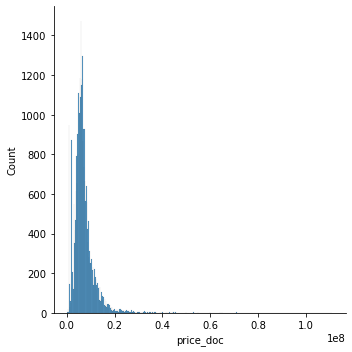

In [6]:
sns.displot(df['price_doc'])

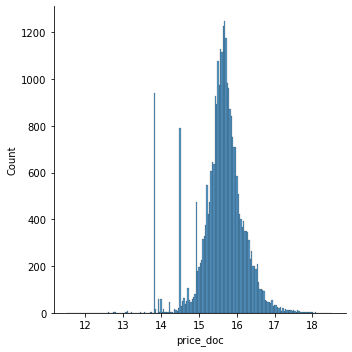

In [7]:
sns.displot(np.log(df['price_doc']))

In [8]:
feature_importance = [
    'full_sq',
    'cafe_count_2000',
    'cafe_count_3000_price_2500',
    'zd_vokzaly_avto_km',
    'num_room',
    'build_year',
    'green_part_2000',
    'power_transmission_line_km',
    'state',
    'sport_count_3000',
    'max_floor',
    'culture_objects_top_25',
    'floor',
    'church_count_2000',
    'cafe_count_1500_price_1500',
    'kitch_sq',
    'product_type',
    'young_all',
    'prom_part_500',
    'green_zone_km',
    'metro_min_walk',
    'life_sq',
    'railroad_km',
    'build_count_monolith',
    'industrial_km'
]

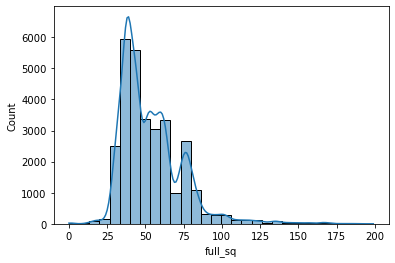

In [9]:
out = sns.histplot(df[df['full_sq'] < 200]['full_sq'], kde=True, bins=30)

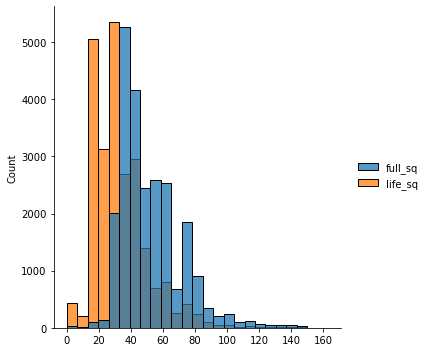

In [10]:
sns.displot(df[(df['full_sq'] < 150) & (df['life_sq'] < 170)][['full_sq','life_sq']], bins=25)

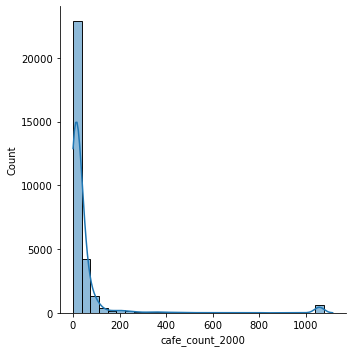

In [11]:
sns.displot(df['cafe_count_2000'], kde=True, bins=30)

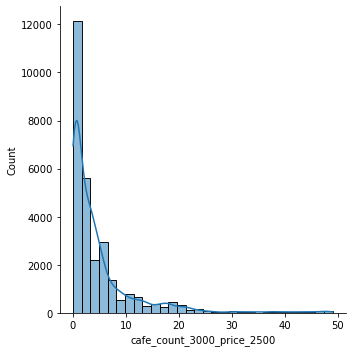

In [12]:
sns.displot(df[df['cafe_count_3000_price_2500'] < 50]['cafe_count_3000_price_2500'], kde=True, bins=30)

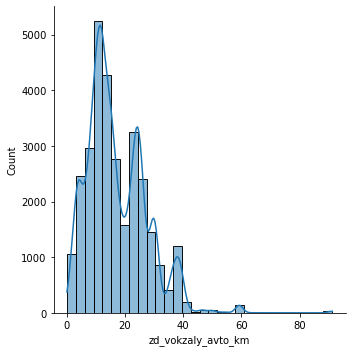

In [13]:
sns.displot(df['zd_vokzaly_avto_km'], kde=True, bins=30)

<AxesSubplot:xlabel='num_room', ylabel='price_doc'>

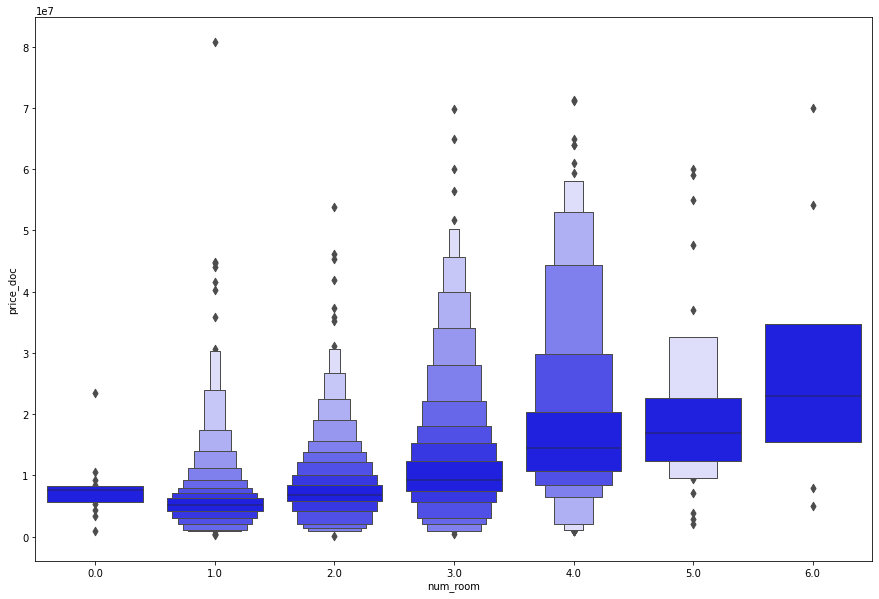

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxenplot(x="num_room", 
              y="price_doc",
              color="b",
              scale="linear", 
              data=df[df['num_room'] < 7])

In [15]:
# sns.displot(df['build_year'])

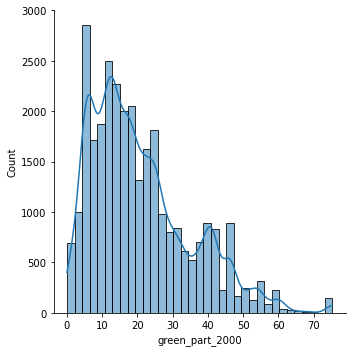

In [16]:
sns.displot(df['green_part_2000'], bins=35, kde=True)

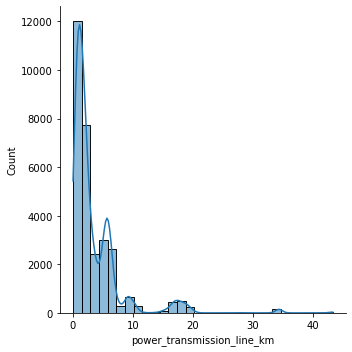

In [17]:
sns.displot(df['power_transmission_line_km'], bins=30, kde=True)

<AxesSubplot:xlabel='state', ylabel='count'>

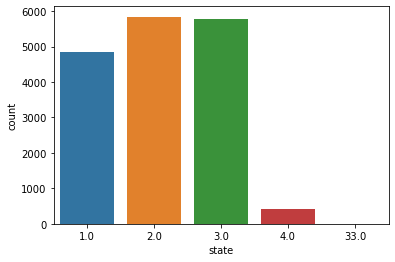

In [18]:
data = df['state'].value_counts()
data = pd.DataFrame({'state' : data.index,'count' : list(data)}, index=range(len(data)))
data.sort_values('state', inplace=True)
sns.barplot(x="state", y='count', data=data)

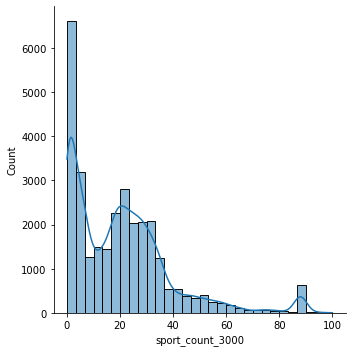

In [19]:
sns.displot(df['sport_count_3000'], bins=30, kde=True)

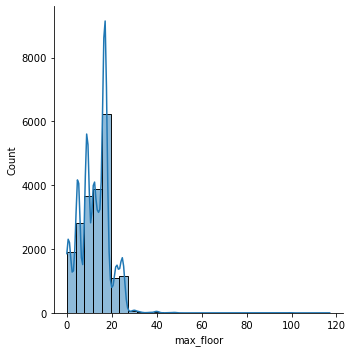

In [20]:
sns.displot(df['max_floor'], bins=30, kde=True)

<AxesSubplot:xlabel='culture_objects_top_25', ylabel='count'>

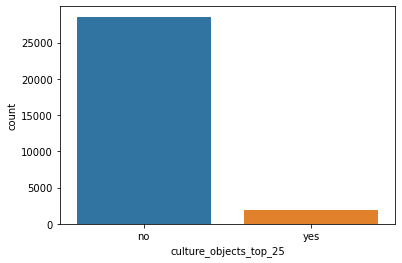

In [21]:
data = df['culture_objects_top_25'].value_counts()
data = pd.DataFrame({'culture_objects_top_25' : data.index,'count' : list(data)}, index=range(len(data)))
data.sort_values('culture_objects_top_25', inplace=True)
sns.barplot(x="culture_objects_top_25", y='count', data=data)

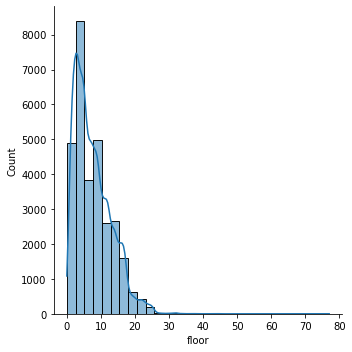

In [22]:
sns.displot(df['floor'], bins=30, kde=True)

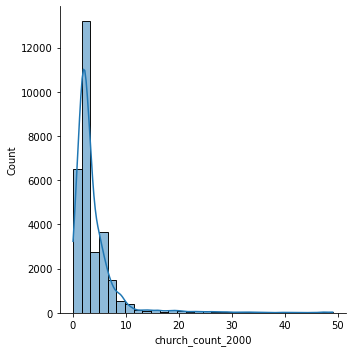

In [23]:
sns.displot(df[df['church_count_2000'] < 50]['church_count_2000'], bins=30, kde=True)

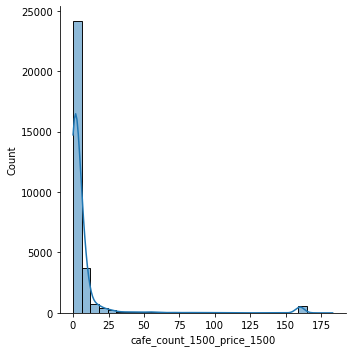

In [24]:
sns.displot(df['cafe_count_1500_price_1500'], bins=30, kde=True)

<AxesSubplot:xlabel='product_type', ylabel='count'>

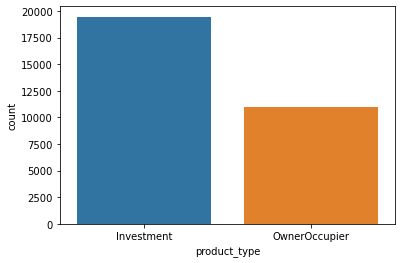

In [25]:
data = df['product_type'].value_counts()
data = pd.DataFrame({'product_type' : data.index,'count' : list(data)}, index=range(len(data)))
data.sort_values('product_type', inplace=True)
sns.barplot(x="product_type", y='count', data=data)

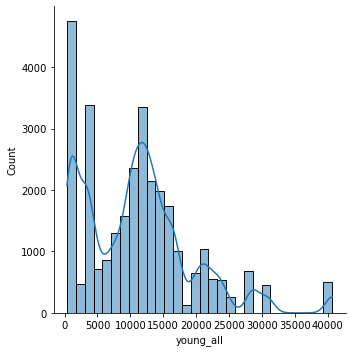

In [26]:
sns.displot(df['young_all'], bins=30, kde=True)

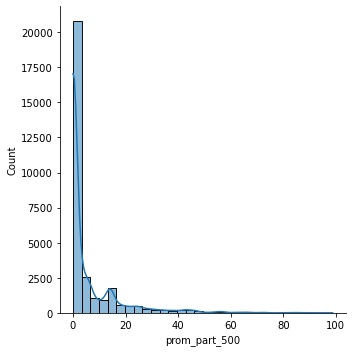

In [27]:
sns.displot(df['prom_part_500'], bins=30, kde=True)

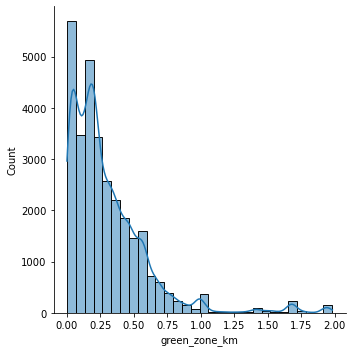

In [28]:
sns.displot(df['green_zone_km'], bins=30, kde=True)

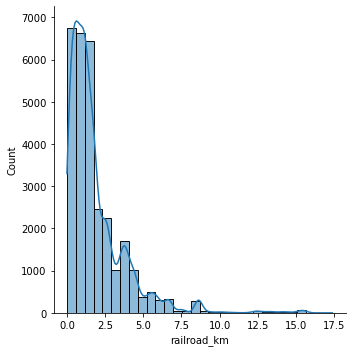

In [29]:
sns.displot(df['railroad_km'], bins=30, kde=True)

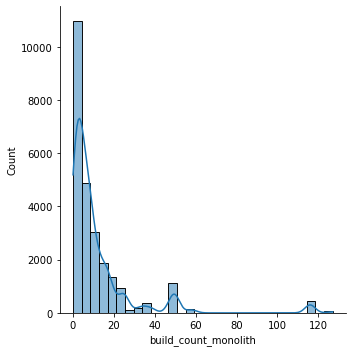

In [30]:
sns.displot(df['build_count_monolith'], bins=30, kde=True)

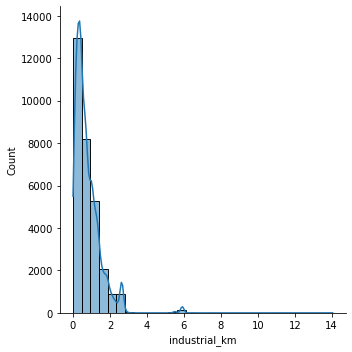

In [31]:
sns.displot(df['industrial_km'], bins=30, kde=True)

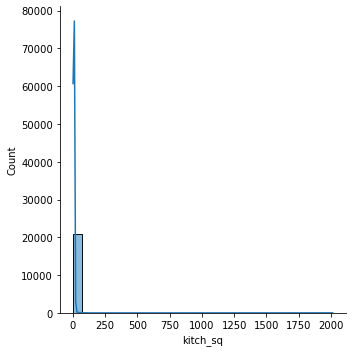

In [32]:
sns.displot(df['kitch_sq'], bins=30, kde=True)

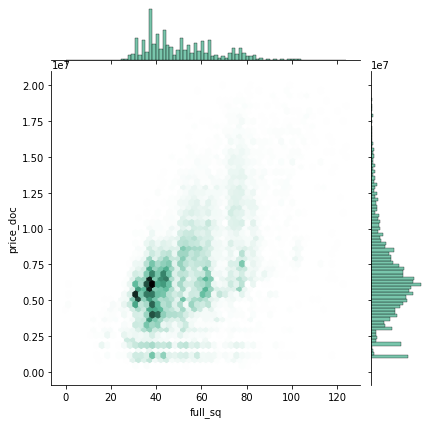

In [33]:
data = df[(df['full_sq'] < 125) & (df['price_doc'] < 2e7)]
sns.jointplot(x=data['full_sq'], y=data['price_doc'], kind="hex", color="#4CB391")

<AxesSubplot:xlabel='num_room', ylabel='count'>

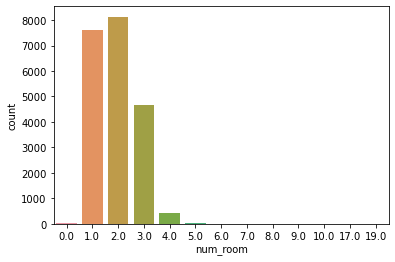

In [34]:
data = df['num_room'].value_counts()
data = pd.DataFrame({'num_room' : data.index,'count' : list(data)}, index=range(len(data)))
data.sort_values('num_room', inplace=True)
sns.barplot(x="num_room", y='count', data=data)

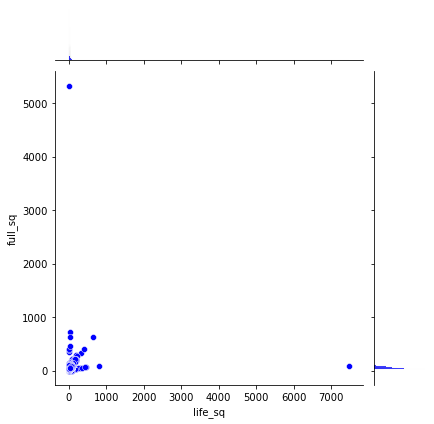

In [35]:
g = sns.jointplot(x=df['life_sq'], y=df['full_sq'], color="b")
# g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

<AxesSubplot:xlabel='timestamp'>

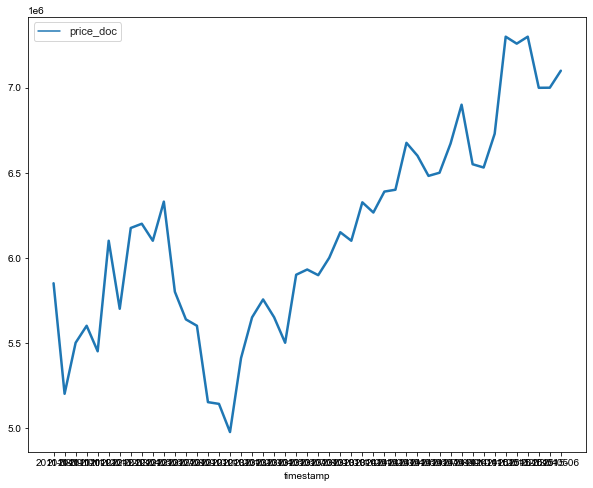

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set_theme(style="whitegrid")
data = df[['timestamp'] + ['price_doc']]
data['timestamp'] = data['timestamp'].apply(lambda x : x[:-3])
data = data.groupby(['timestamp']).quantile()
sns.lineplot(data = data, palette="tab10", linewidth=2.5)

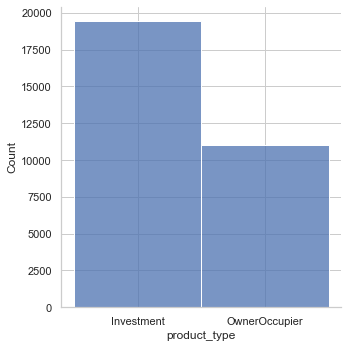

In [37]:
sns.displot(df['product_type'])

<AxesSubplot:>

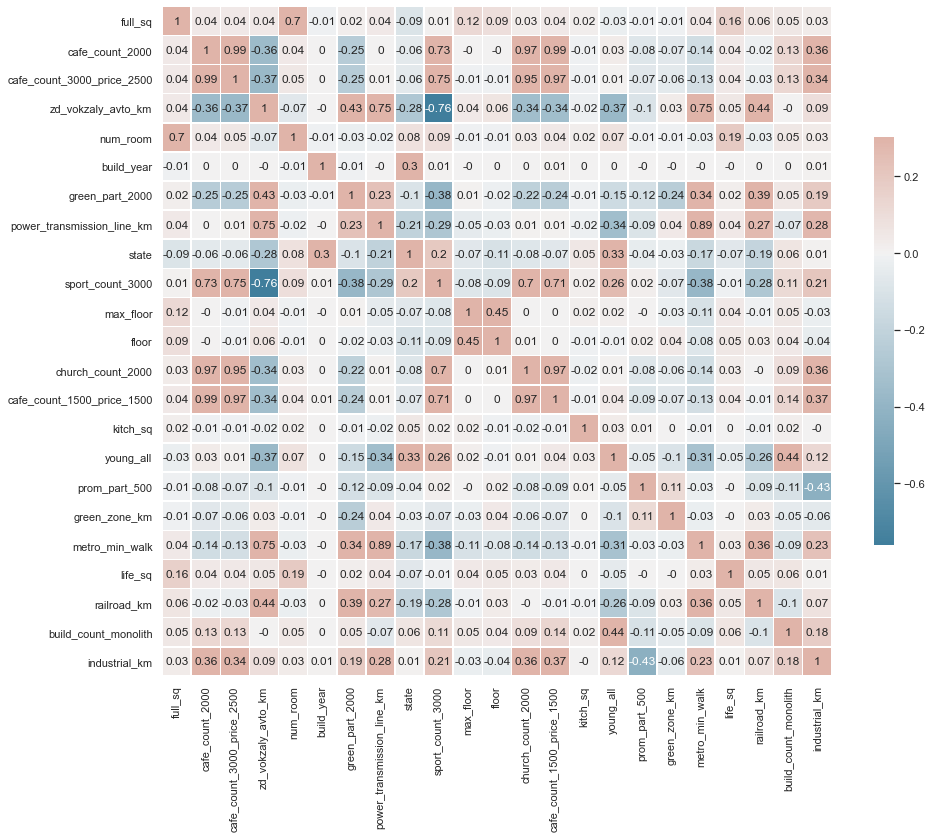

In [38]:
corr = df[feature_importance].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr.apply(lambda x : round(x, 2)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:xlabel='ecology', ylabel='price_doc'>

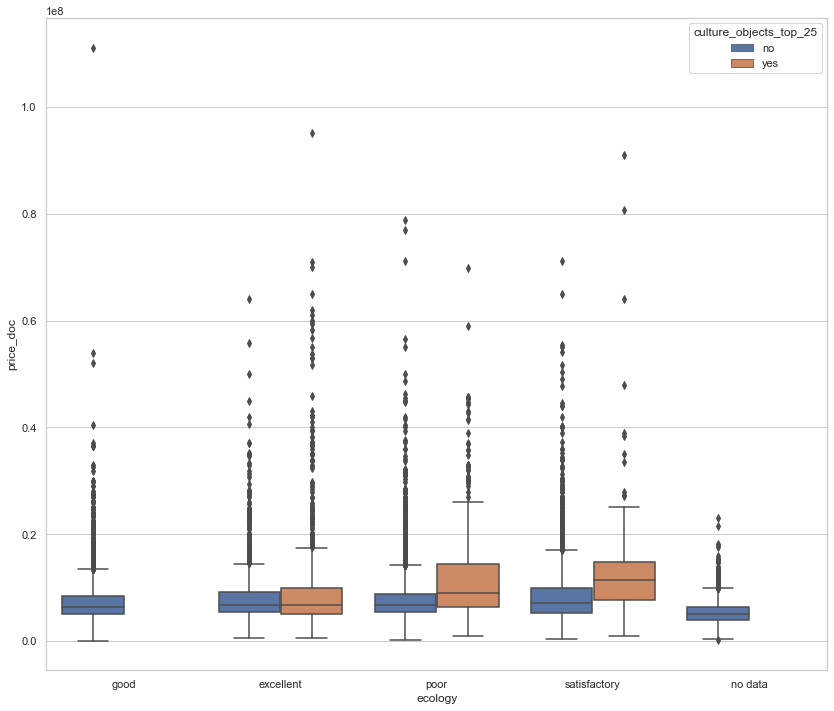

In [39]:
f, ax = plt.subplots(figsize=(14, 12))
sns.boxplot(x="ecology", y="price_doc", hue="culture_objects_top_25", data=df)

In [40]:
df[feature_importance]

,full_sq,cafe_count_2000,cafe_count_3000_price_2500,zd_vokzaly_avto_km,num_room,build_year,green_part_2000,power_transmission_line_km,state,sport_count_3000,...,kitch_sq,product_type,young_all,prom_part_500,green_zone_km,metro_min_walk,life_sq,railroad_km,build_count_monolith,industrial_km
id,,,,,,,,,,,,,,,,,,,,,
1,43,36,3,14.231961,NaN,NaN,11.77,1.062513,NaN,21,...,NaN,Investment,21154,0.00,0.600973,13.575119,27.0,1.305159,2.0,1.080934
2,34,21,2,9.242586,NaN,NaN,22.37,1.246149,NaN,19,...,NaN,Investment,15727,0.00,0.065321,7.620630,19.0,0.694536,4.0,0.966479
3,43,24,3,9.540544,NaN,NaN,12.99,1.602183,NaN,20,...,NaN,Investment,13028,0.00,0.453172,17.351515,29.0,0.700691,4.0,0.939275
4,89,25,3,17.478380,NaN,NaN,32.29,1.767612,NaN,18,...,NaN,Investment,28563,0.57,0.106125,11.565624,50.0,1.999265,50.0,0.451173
5,77,483,149,1.595898,NaN,NaN,4.53,3.632640,NaN,77,...,NaN,Investment,13368,4.44,0.236214,8.266305,77.0,0.084113,16.0,0.392871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,44,43,5,11.396447,2.0,1975.0,9.93,2.046756,3.0,29,...,6.0,Investment,21400,0.00,0.139814,8.158093,27.0,1.137603,5.0,0.702853
30470,86,444,155,1.010437,4.0,1935.0,5.95,3.295494,3.0,80,...,10.0,Investment,11272,0.80,0.271861,9.374609,59.0,0.377368,25.0,0.473020
30471,45,7,1,25.699461,1.0,NaN,38.61,5.506770,1.0,6,...,1.0,OwnerOccupier,574,3.70,0.427248,20.666800,NaN,1.727223,NaN,0.353642


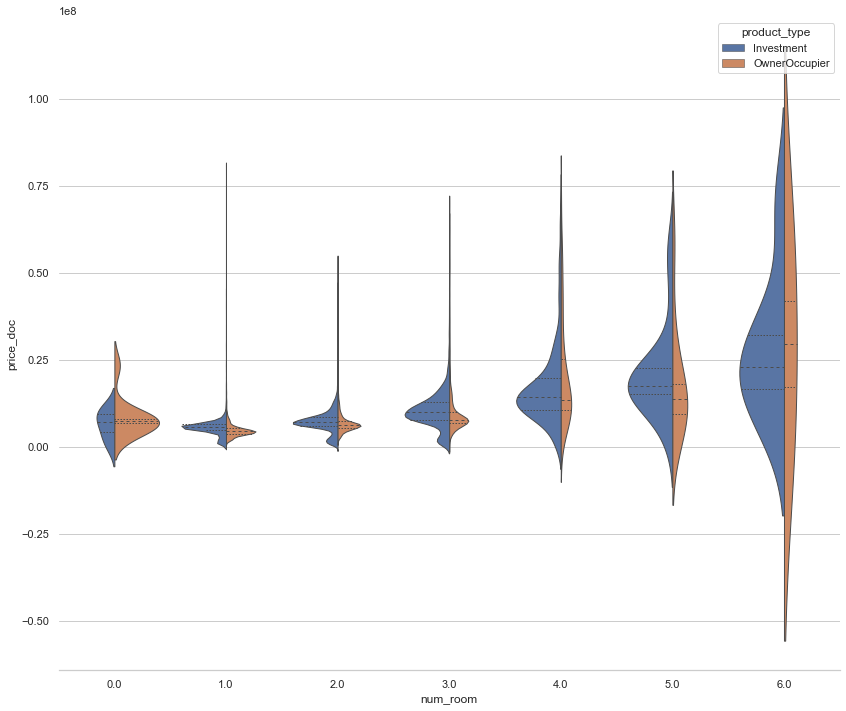

In [41]:
f, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=df[df['num_room'] < 7], x="num_room", y="price_doc", hue="product_type",
               split=True, inner="quart", linewidth=1, scale='count'
              )
sns.despine(left=True)

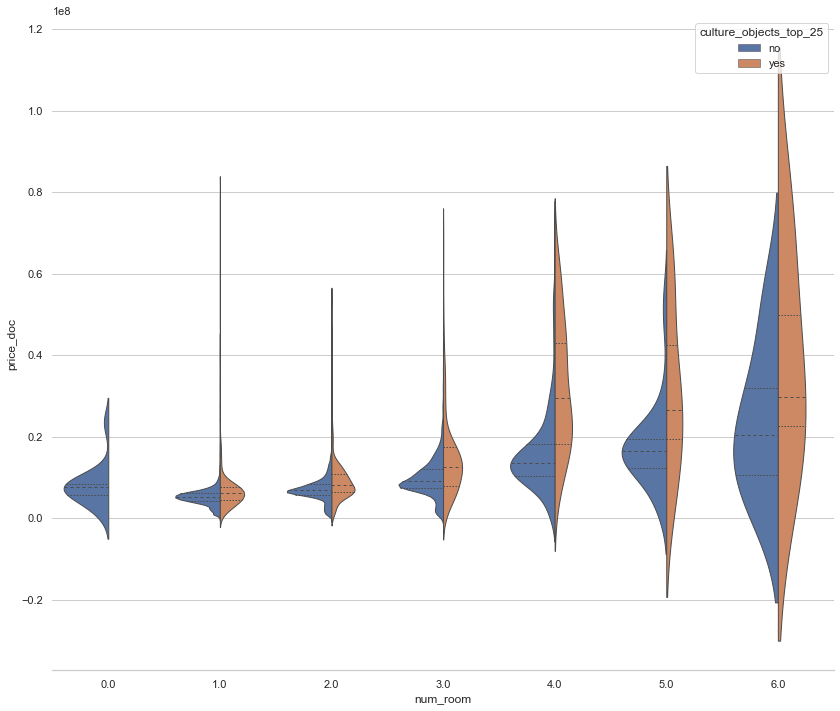

In [42]:
f, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=df[df['num_room'] < 7], x="num_room", y="price_doc", hue="culture_objects_top_25",
               split=True, inner="quart", linewidth=1, scale='area'
              )
sns.despine(left=True)